# Filter's hyperparameters tuning

In [1]:
import sys
sys.path.append('..')
from grail_metabolism.utils.optuna import OptunaWrapper
from grail_metabolism.utils.preparation import MolFrame

ATTENTION: RXNMapper is not installed. Please install it first if you want to create your own set of rules.
ATTENTION: you use incorrect for rxnmapper version of rdkit


In [2]:
tune = OptunaWrapper() # Main class for Optuna

### val_frame

In [3]:
val_triples = MolFrame.read_triples('../grail_metabolism/data/val_triples.txt')
val_frame = MolFrame.from_file('../grail_metabolism/data/val.sdf', val_triples, standartize=False)

Processing reactions:   0%|          | 0/1061 [00:00<?, ?it/s]

Full preparation of val_frame - morganize, create graph molecular representations and binary vectors of reaction rules labels

In [4]:
val_frame.full_setup()

Morgan fingerprints generation


  0%|          | 0/36621 [00:00<?, ?it/s]

Pair graphs generation


  0%|          | 0/1035 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Single graphs generation


  0%|          | 0/1035 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/36012 [00:00<?, ?it/s]

Some issue happened with this molecule:
I tensor([], size=(0, 18), dtype=torch.float64) tensor([[ -1.7835, -13.7837,   0.2648,   0.9855,  -0.0512,   6.1740,  16.5073,
          -0.8586,  12.9492,  -6.1578]], dtype=torch.float64)
Some issue happened with this molecule:
F tensor([], size=(0, 18), dtype=torch.float64) tensor([[ 0.3778, -2.9029, -0.0516,  0.0207, -0.0122,  0.2819,  0.6688, -0.5291,
         -0.0579,  0.9071]], dtype=torch.float64)


### train_frame

In [5]:
triples = MolFrame.read_triples('../grail_metabolism/data/train_triples.txt')
train_frame = MolFrame.from_file('../grail_metabolism/data/train.sdf', triples, standartize=False)

Processing reactions:   0%|          | 0/9182 [00:00<?, ?it/s]

In [6]:
del train_frame.map['O=C(OC1OC2COC(=O)c3cc(O)c(O)c(O)c3-c3c(cc(O)c(O)c3O)C(=O)OC2C2OC(=O)c3cc(O)c(O)c(O)c3-c3c(cc(O)c(O)c3O)C(=O)OC12)c1cc(O)c(O)c(Oc2c(O)c(O)c(O)c3c2C(=O)OC2C(COC(=O)c4cc(O)c(O)c(O)c4-3)OC(OC(=O)c3cc(O)c(O)c(O)c3)C3OC(=O)c4cc(O)c(O)c(O)c4-c4c(cc(O)c(O)c4O)C(=O)OC23)c1']
del train_frame.gen_map['O=C(OC1OC2COC(=O)c3cc(O)c(O)c(O)c3-c3c(cc(O)c(O)c3O)C(=O)OC2C2OC(=O)c3cc(O)c(O)c(O)c3-c3c(cc(O)c(O)c3O)C(=O)OC12)c1cc(O)c(O)c(Oc2c(O)c(O)c(O)c3c2C(=O)OC2C(COC(=O)c4cc(O)c(O)c(O)c4-3)OC(OC(=O)c3cc(O)c(O)c(O)c3)C3OC(=O)c4cc(O)c(O)c(O)c4-c4c(cc(O)c(O)c4O)C(=O)OC23)c1']

Full preparation of train_frame

In [ ]:
train_frame.full_setup()

Morgan fingerprints generation


  0%|          | 0/308638 [00:00<?, ?it/s]

### Make study

[I 2025-05-18 01:05:05,180] A new study created in memory with name: filter_pair


Starting DataLoaders generation


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

[W 2025-05-18 02:15:57,822] Trial 0 failed because of the following error: TypeError("Filter.forward() missing 1 required positional argument: 'met'")
Traceback (most recent call last):
  File "/Users/nikitapolomosnov/anaconda3/envs/aizynth-env/lib/python3.10/site-packages/optuna/study/_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "/Users/nikitapolomosnov/PycharmProjects/GRAIL/grail_metabolism/../grail_metabolism/utils/optuna.py", line 55, in objective
    mcc, roc = test_set.test(model, mode=self.mode)
  File "/Users/nikitapolomosnov/anaconda3/envs/aizynth-env/lib/python3.10/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/Users/nikitapolomosnov/PycharmProjects/GRAIL/grail_metabolism/../grail_metabolism/utils/preparation.py", line 972, in test
    out = model(*data)
  File "/Users/nikitapolomosnov/anaconda3/envs/aizynth-env/lib/python3.10/site-packages/torch/nn/modules/module.py", line 

TypeError: Filter.forward() missing 1 required positional argument: 'met'

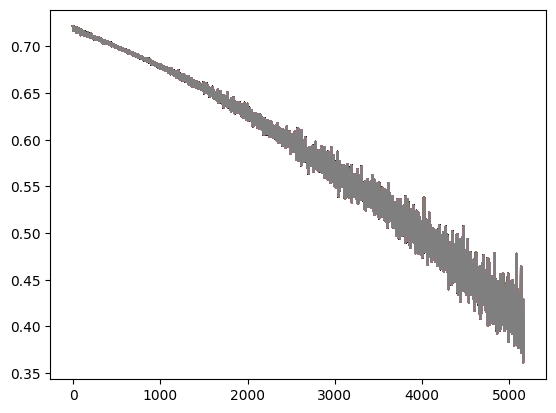

In [10]:
study = tune.make_study(train_frame, val_frame, 'filter')

In [14]:
list(val_frame.negs.keys())[864]

'O=C(COc1ccc(C(=O)CN2CCN(C3CCNCC3)CC2=O)cc1)OC1CCCCC1'

In [ ]:
864